<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/GDSTK_Meandering_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdstk hilbertcurve

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 534.7/534.7 kB 19.9 MB/s eta 0:00:00


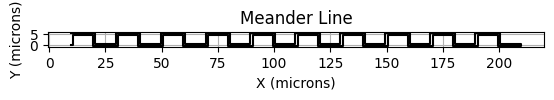

In [2]:
import gdstk
import matplotlib.pyplot as plt
import numpy as np

# Parameters
iterations = 20
line_width = 1.0  # in microns
segment_length = 10.0  # length of horizontal segments
segment_height = 5.0   # height of vertical segments

# Initialize starting point
points = []
x, y = 0.0, 0.0
direction = 1  # 1 for up, -1 for down

for i in range(iterations):
    # Horizontal segment
    x += segment_length
    points.append((x, y))
    # Vertical segment
    y += direction * segment_height
    points.append((x, y))
    # Reverse direction
    direction *= -1

# Final horizontal segment to complete the pattern
x += segment_length
points.append((x, y))

# Create FlexPath
path = gdstk.FlexPath(points, line_width)

# Create cell and library
cell = gdstk.Cell("MEANDER_LINE")
cell.add(path)
lib = gdstk.Library()
lib.add(cell)

# Write to GDSII file
lib.write_gds("meander_line.gds") # Be sure that this name matches the name of the output GDS

# Plot using matplotlib
fig, ax = plt.subplots()
for polygon in path.to_polygons():
    x_coords, y_coords = zip(*polygon.points)
    ax.plot(x_coords, y_coords, 'k-')
ax.set_aspect('equal')
plt.title("Meander Line")
plt.xlabel("X (microns)")
plt.ylabel("Y (microns)")
plt.grid(True)
plt.show()

In [ ]:
from google.colab import files
files.download("meander_line.gds")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

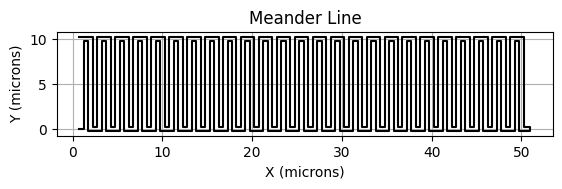

In [ ]:
import gdstk
import matplotlib.pyplot as plt
import numpy as np

# Parameters
iterations = 50
line_width = 0.5  # in microns
segment_length = 1.0  # length of horizontal segments
segment_height = 10.0   # height of vertical segments

# Initialize starting point
points = []
x, y = 0.0, 0.0
direction = 1  # 1 for up, -1 for down

for i in range(iterations):
    # Horizontal segment
    x += segment_length
    points.append((x, y))
    # Vertical segment
    y += direction * segment_height
    points.append((x, y))
    # Reverse direction
    direction *= -1

# Final horizontal segment to complete the pattern
x += segment_length
points.append((x, y))

# Create FlexPath
path = gdstk.FlexPath(points, line_width)

# Create cell and library
cell = gdstk.Cell("MEANDER_LINE")
cell.add(path)
lib = gdstk.Library()
lib.add(cell)

# Write to GDSII file
lib.write_gds("wide_meander_line.gds")

# Plot using matplotlib
fig, ax = plt.subplots()
for polygon in path.to_polygons():
    x_coords, y_coords = zip(*polygon.points)
    ax.plot(x_coords, y_coords, 'k-')
ax.set_aspect('equal')
plt.title("Meander Line")
plt.xlabel("X (microns)")
plt.ylabel("Y (microns)")
plt.grid(True)
plt.show()

In [ ]:
from google.colab import files
files.download("wide_meander_line.gds")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

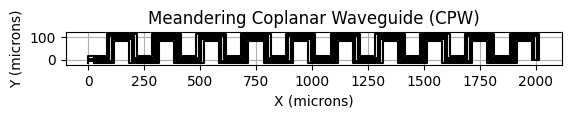

In [28]:
import gdstk
import numpy as np
import matplotlib.pyplot as plt

# Parameters
total_length = 2000.0  # microns
center_width = 10.0    # microns
gap = 6.0              # microns
segment_length = 100.0 # microns
bend_radius = 100.0     # microns

# Calculate the number of segments needed
num_segments = int(total_length / segment_length)

# Initialize starting point
x, y = 0.0, 0.0
direction = 1  # 1 for up, -1 for down

# Create path points
points = [(x, y)]
for i in range(num_segments):
    x += segment_length
    points.append((x, y))
    y += direction * segment_length
    points.append((x, y))
    direction *= -1  # Reverse direction

# Create RobustPath for center conductor
center_path = gdstk.RobustPath(points[0], center_width, layer=1)
for pt in points[1:]:
    center_path.segment(pt)

# Create RobustPaths for gaps (left and right)
left_gap = gdstk.RobustPath(points[0], center_width, offset=center_width/2 + gap, layer=2)
right_gap = gdstk.RobustPath(points[0], center_width, offset=-(center_width/2 + gap), layer=2)
for pt in points[1:]:
    left_gap.segment(pt)
    right_gap.segment(pt)

# Create cell and library
cell = gdstk.Cell("MEANDERING_CPW")
cell.add(center_path)
cell.add(left_gap)
cell.add(right_gap)
lib = gdstk.Library()
lib.add(cell)

# Write to GDSII file
lib.write_gds("meandering_cpw.gds")

# Plot using matplotlib
fig, ax = plt.subplots()
for path in [center_path, left_gap, right_gap]:
    for polygon in path.to_polygons():
        x_coords, y_coords = zip(*polygon.points)
        ax.plot(x_coords, y_coords, 'k-')
ax.set_aspect('equal')
plt.title("Meandering Coplanar Waveguide (CPW)")
ax.set_xlabel("X (microns)")
ax.set_ylabel("Y (microns)")
ax.grid(True)
plt.show()

In [29]:
from google.colab import files
files.download("meandering_cpw.gds")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>